In [3]:
shape_cat=""
vol=""
z_range=""
key=""

In [4]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"
key = "lambda"


In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [7]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [8]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)

In [9]:
cluster_list=[None]*3
for quantile in range(3):
    cluster_list[quantile]=np.load("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile))

In [10]:
print(clusters_list[0][key].mean())
print(clusters_list[1][key].mean())
print(clusters_list[2][key].mean())

21.287612915039062
25.222261428833008
37.5440559387207


In [11]:
# sum_abs,mean_abs,sig_abs,sum_rel,mean_rel,sig_rel,r_xi,r_meanlogr,r_sigma

In [15]:
def plt_w_error(cluster_file,label_):
    mean_rel=cluster_file['mean_rel']
    sig_rel=cluster_file['sig_rel']
    
    meanlogr=mean_rel[1]
    xi=mean_rel[0]
    varxi=sig_rel
    
    
    ax.errorbar(np.exp(meanlogr),-xi,yerr=varxi,label=label_)
    ax.set_xscale('log')

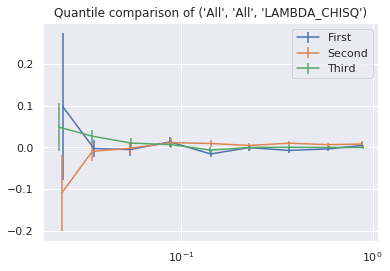

In [16]:
fig,ax=plt.subplots()

label_list=["First","Second","Third"]

for i,cluster_file in enumerate(cluster_list):
    plt_w_error(cluster_file,label_list[i])
    plt.legend()
    plt.title("Quantile comparison of {}".format(key))

# Statistics

In [14]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)